In [15]:
import pandas as pd

eda_df = pd.read_csv("short_term_spend_model_data.csv")

eda_df.head()


,customer_id,transaction_date,daily_spend,total_qty,avg_price,transactions,avg_discount,next_30d_spend,region,city,gender,age,store_type
0,C00001,2025-09-18,593.16,2,296.58,2,0.0,5351.521955,South,Southport,M,41,Outlet
1,C00001,2025-09-19,49.72,4,12.43,1,0.0,5318.911955,South,Southport,M,41,Outlet
2,C00001,2025-09-21,97.61,1,97.61,1,0.0,5465.471955,South,Southport,M,41,Outlet
3,C00001,2025-09-23,360.00,2,180.00,1,0.0,5951.431955,South,Southport,M,41,Outlet
4,C00001,2025-09-24,500.00,2,250.00,1,0.0,6443.543630,South,Southport,M,41,Outlet


In [16]:
eda_df.shape
eda_df.info()
eda_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19211 entries, 0 to 19210
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       19211 non-null  object 
 1   transaction_date  19211 non-null  object 
 2   daily_spend       19211 non-null  float64
 3   total_qty         19211 non-null  int64  
 4   avg_price         19211 non-null  float64
 5   transactions      19211 non-null  int64  
 6   avg_discount      19211 non-null  float64
 7   next_30d_spend    19211 non-null  float64
 8   region            19211 non-null  object 
 9   city              19211 non-null  object 
 10  gender            19211 non-null  object 
 11  age               19211 non-null  int64  
 12  store_type        19211 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 1.9+ MB


,daily_spend,total_qty,avg_price,transactions,avg_discount,next_30d_spend,age
count,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000
mean,308.641726,2.792567,123.918221,1.890636,0.025336,9250.850206,35.232055
std,434.367714,1.976125,154.900910,1.074798,0.050888,5794.308666,10.911359
min,2.452620,1.000000,2.460000,1.000000,0.000000,1133.524370,18.000000
25%,59.900000,1.000000,34.520000,1.000000,0.000000,5327.732198,27.000000
50%,151.741935,2.000000,72.525000,2.000000,0.000000,7270.993155,36.000000
75%,365.585000,4.000000,140.591667,2.000000,0.030000,10862.102165,42.000000
max,5063.520000,20.000000,900.000000,11.000000,0.300000,34172.629840,75.000000


In [17]:
eda_df["next_30d_spend"].describe()


count    19211.000000
mean      9250.850206
std       5794.308666
min       1133.524370
25%       5327.732198
50%       7270.993155
75%      10862.102165
max      34172.629840
Name: next_30d_spend, dtype: float64

In [18]:
# eda_df.groupby("loyalty_tier")["next_30d_spend"].mean()
eda_df.groupby("region")["next_30d_spend"].mean()
eda_df.groupby("store_type")["next_30d_spend"].mean()


store_type
Mall         9241.804821
OnlineHub    8856.545203
Outlet       8899.394411
Street       9740.433594
Name: next_30d_spend, dtype: float64

In [19]:
eda_df.corr(numeric_only=True)["next_30d_spend"].sort_values(ascending=False)


next_30d_spend    1.000000
daily_spend       0.443525
avg_price         0.407646
transactions      0.120313
total_qty         0.075512
avg_discount      0.009356
age               0.001282
Name: next_30d_spend, dtype: float64

In [20]:
eda_df.isnull().sum()


customer_id         0
transaction_date    0
daily_spend         0
total_qty           0
avg_price           0
transactions        0
avg_discount        0
next_30d_spend      0
region              0
city                0
gender              0
age                 0
store_type          0
dtype: int64

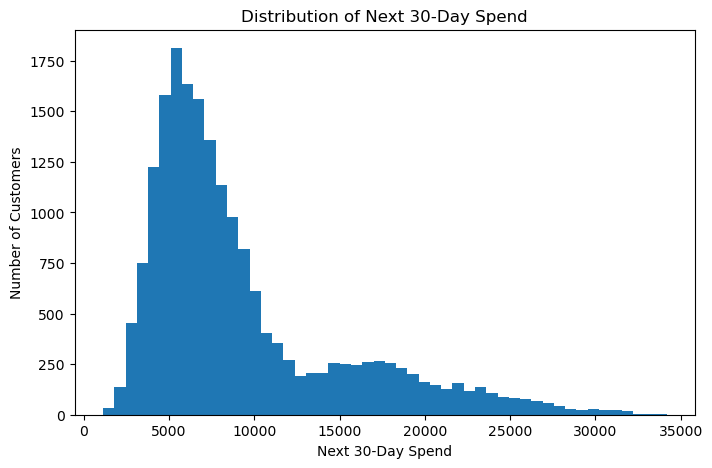

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(eda_df["next_30d_spend"], bins=50)
plt.title("Distribution of Next 30-Day Spend")
plt.xlabel("Next 30-Day Spend")
plt.ylabel("Number of Customers")
plt.show()


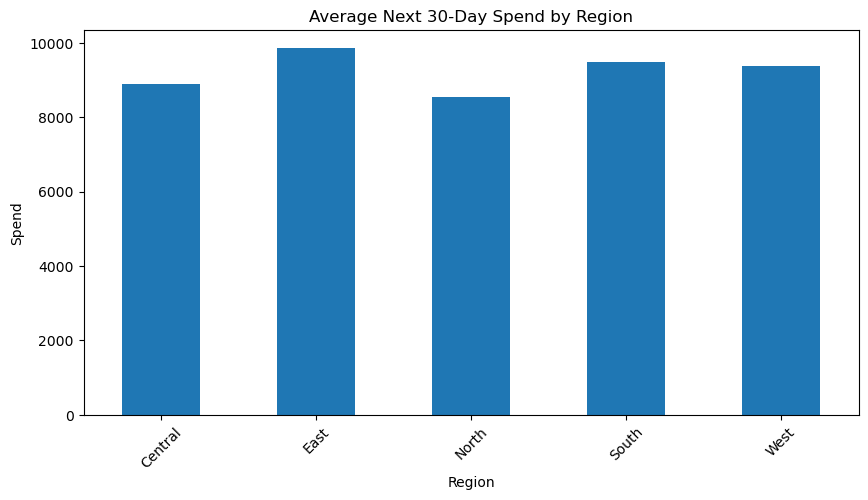

In [22]:
region_spend = eda_df.groupby("region")["next_30d_spend"].mean()

plt.figure(figsize=(10,5))
region_spend.plot(kind="bar")
plt.title("Average Next 30-Day Spend by Region")
plt.ylabel("Spend")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


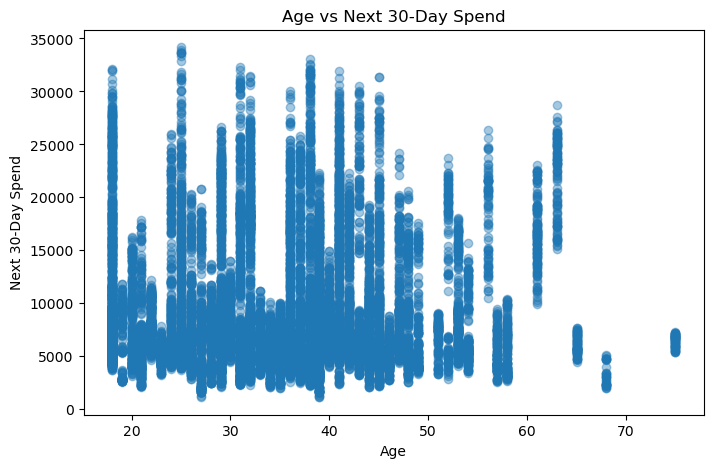

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(eda_df["age"], eda_df["next_30d_spend"], alpha=0.4)
plt.title("Age vs Next 30-Day Spend")
plt.xlabel("Age")
plt.ylabel("Next 30-Day Spend")
plt.show()


In [24]:
import matplotlib.pyplot as plt
import numpy as np

num_df = eda_df.select_dtypes(include=["int64", "float64"])
corr = num_df.corr()


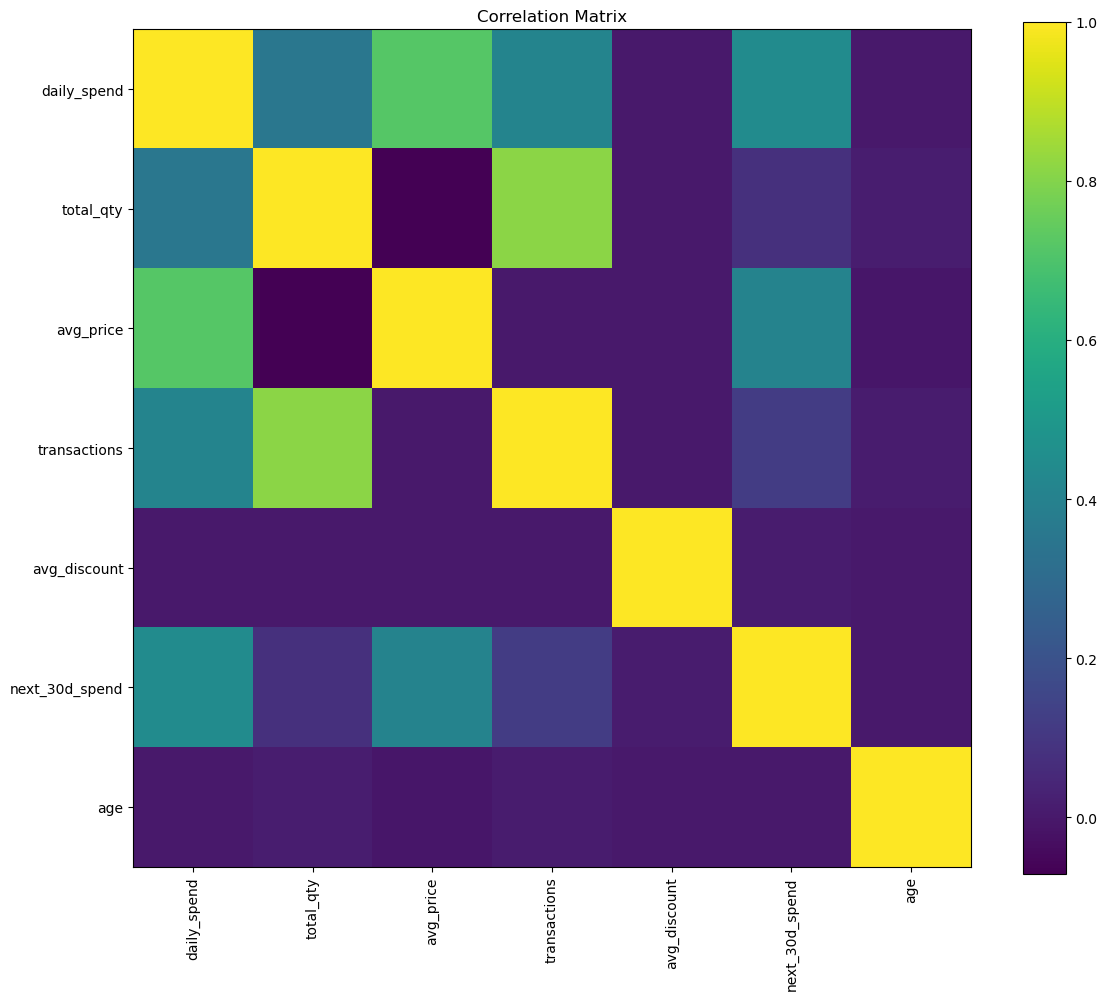

In [25]:
plt.figure(figsize=(12,10))
plt.imshow(corr)
plt.title("Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()


In [26]:
eda_df.columns


Index(['customer_id', 'transaction_date', 'daily_spend', 'total_qty',
       'avg_price', 'transactions', 'avg_discount', 'next_30d_spend', 'region',
       'city', 'gender', 'age', 'store_type'],
      dtype='object')